<a href="https://colab.research.google.com/github/KetsiaKay/co2-emission/blob/main/MATH_2315_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [2]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

## Lab introduction

The goal of this lab is to analyze the IMDB movies data set from the vega data sets in order to determine whether movies that are more expensive to produce make more money worldwide and determine if movies ratings help predict the worldwide gross of a movie. 



## Import and set up the data set

### Load the data



In [3]:
from vega_datasets import data

Create a Pandas data frame for the movies data set.

In [4]:
df = data.movies()

For simplicity, remove any rows that have NaN's from the data frame.

In [5]:
df = df.dropna()

## Explore the data set

Display the head of the data frame

In [6]:
df.head()

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
1064,12 Rounds,12234694.0,18184083.0,8283859.0,20000000.0,Mar 27 2009,PG-13,108.0,20th Century Fox,Original Screenplay,Action,Contemporary Fiction,Renny Harlin,28.0,5.4,8914.0
1074,2012,166112167.0,766812167.0,50736023.0,200000000.0,Nov 13 2009,PG-13,158.0,Sony Pictures,Original Screenplay,Action,Science Fiction,Roland Emmerich,39.0,6.2,396.0
1090,300,210614939.0,456068181.0,261252400.0,60000000.0,Mar 09 2007,R,117.0,Warner Bros.,Based on Comic/Graphic Novel,Action,Historical Fiction,Zack Snyder,60.0,7.8,235508.0
1095,3:10 to Yuma,53606916.0,69791889.0,51359371.0,48000000.0,Sep 02 2007,R,117.0,Lionsgate,Remake,Western,Historical Fiction,James Mangold,89.0,7.9,98355.0
1107,88 Minutes,16930884.0,32955399.0,11385055.0,30000000.0,Apr 18 2008,R,106.0,Sony Pictures,Original Screenplay,Thriller/Suspense,Contemporary Fiction,Jon Avnet,5.0,5.9,31205.0


This code gives us detailed information about what the head of the data set contains

## Exploratory data analysis

Pair plot to explore relationships between the numerical variables in the data set.

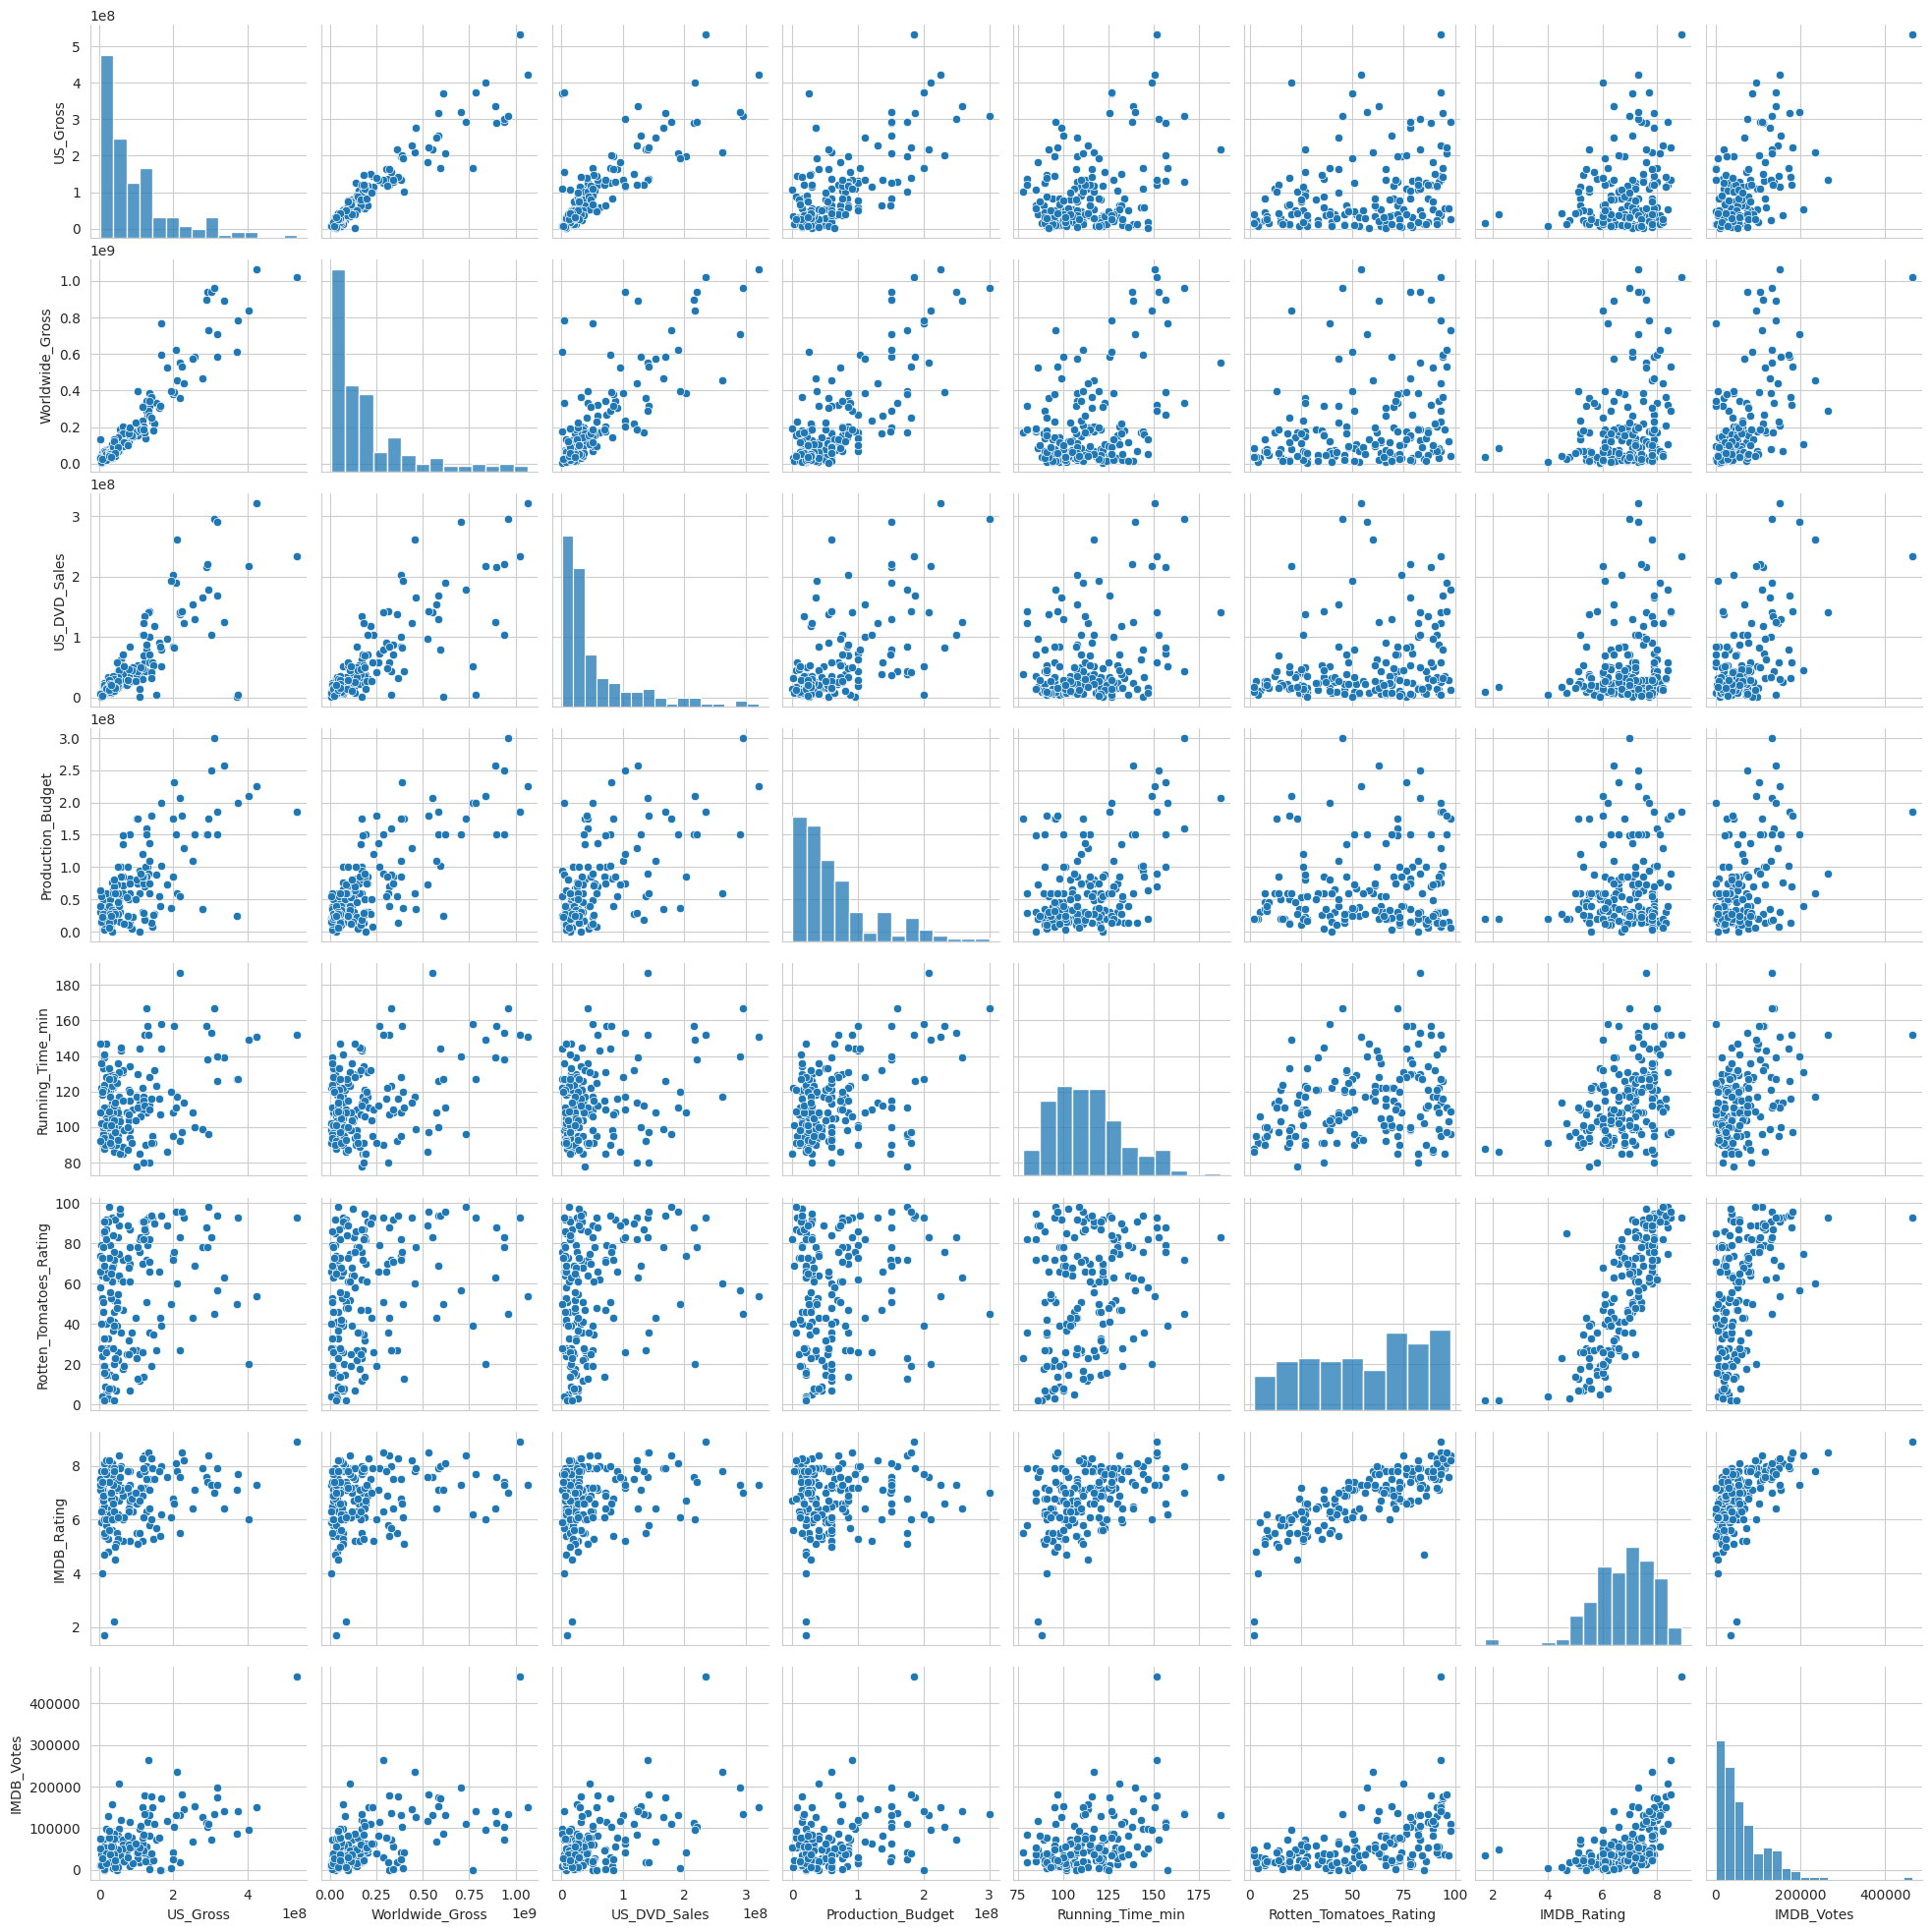

In [7]:

sns.pairplot(df)

The pair plot shows that there are some positively strong linear relationships between the numerical data like in the US_Gross vs. Worldwide_Gross graph but are also some weak relationships like in the Running_Time_min vs. IMDB_Votes graph.

Correlation matrix to explore relationships between the numerical variables

<ipython-input-8-f419683d9fe0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


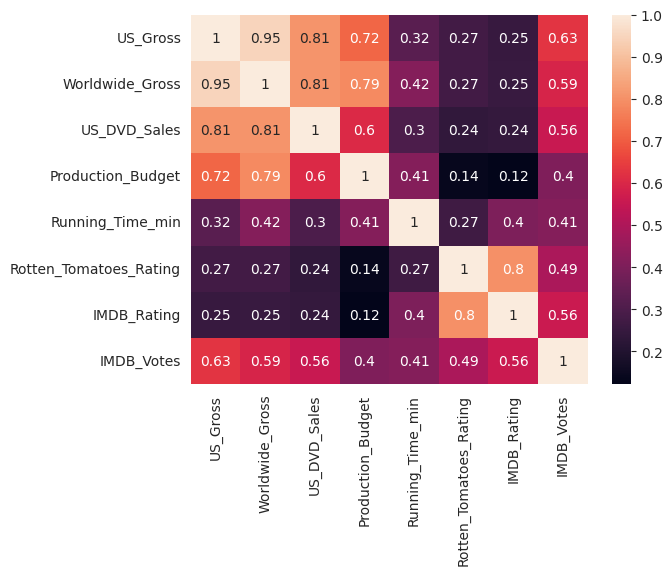

In [8]:
#Generate a correlation matrix plot 
sns.heatmap(df.corr(), annot=True)
plt.show()

This correlation matrix displays r values for the numerical relationships of the data set. As we can see we have a higher number of weak relationships than ones between the data. For example, the r value of the IMDB_Rating vs. the Worldwide_gross is 0.25. This means that the worldwide gross does not necessarily depend on the IMDB ratings, so the IMDB ratings do not accurately predict the worldwide gross.

## Modeling

Display information of the first row of the data set

In [9]:
df.head(1)

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
1064,12 Rounds,12234694.0,18184083.0,8283859.0,20000000.0,Mar 27 2009,PG-13,108.0,20th Century Fox,Original Screenplay,Action,Contemporary Fiction,Renny Harlin,28.0,5.4,8914.0


Information from the first row like the release date, the distributor and IMDB are shown. This is helps have an idea of how the actual data looks like.

### Worldwide gross and production budget

##### $\rightarrow$ Complete the following:

1.  Make a scatter plot of the production budget and worldwide gross of the movie. Describe the relationship.

2.  Perform a regression analysis predicting worldwide gross from production budget. 

    a. Use graphical and numerical methods to assess the fit of a simple linear regression model.
    
    b. Determine whether a quadratic regression model is better than a simple linear regression model.

### Solution

1. Diplay scatter plot of the production budget and the worldwide gross of the movie

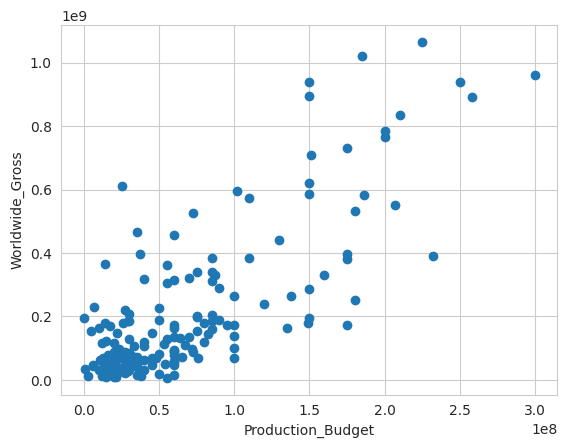

In [10]:
x = df['Production_Budget'].tolist()
y = df['Worldwide_Gross'].tolist()

plt.scatter(x, y)
plt.xlabel('Production_Budget')
plt.ylabel('Worldwide_Gross')
plt.show()

By looking at this scatter plot we can see that the points follow a linearly increasing pattern which means that we have a positive and a pretty strong relationship between the Production_Budget and the Worldwide_Gross. 

2.a Simple Linear Regression Model

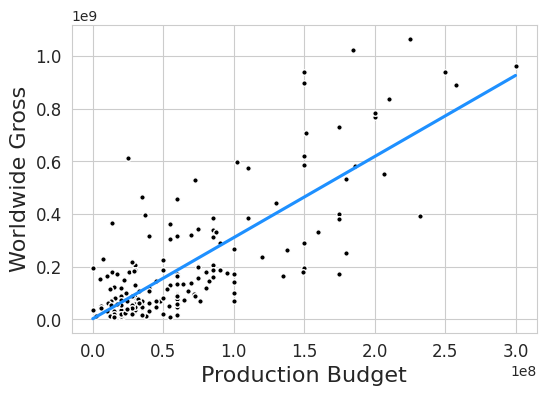

In [11]:
#performs regression analysis 
plt.figure(figsize=(6,4))

plt.plot(df['Production_Budget'], df['Worldwide_Gross'], 'ko', ms = 4, mec='w')

sns.regplot(x ='Production_Budget', y ='Worldwide_Gross', color = 'dodgerblue', data = df, ci = False, scatter = False)

plt.xlabel('Production Budget', fontsize = 16)

plt.ylabel('Worldwide Gross', fontsize = 16)


plt.tick_params(labelsize = 12);

We can see in this model that the regression line in blue is going from the lower left corner to the upper right corner of the first quadrant. This again tells us that the relationship between the two variables is positive. In other words, as the production budget increases the worldwide gross also increases. Therefore, based on these results the movies that have a high production budget do make more money worldwide.

Assess the fit and display the linear regression results as a summary

In [17]:
model_ru = smf.ols(formula='Worldwide_Gross ~ Production_Budget', data=df).fit()
print(model_ru.summary())

                            OLS Regression Results                            
Dep. Variable:        Worldwide_Gross   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     278.8
Date:                Tue, 09 May 2023   Prob (F-statistic):           7.95e-38
Time:                        19:43:23   Log-Likelihood:                -3516.7
No. Observations:                 174   AIC:                             7037.
Df Residuals:                     172   BIC:                             7044.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.642e+06   1.66e+0

This summary confirms the interpretations made previously about the strength of the relationship between the Worldwide_gross and Production_budget variables. This summary tells us that the R-squared value for this data is 0.618. The R-squared value is approaching 1, so the relation is relatively strong as stated previously under the linear regression model. 

2.b Quadratic Regression Model

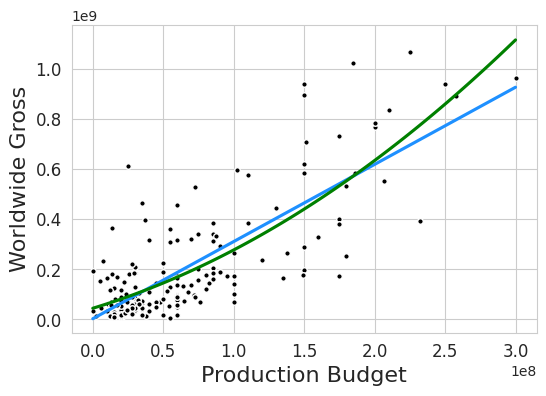

In [14]:
plt.figure(figsize=(6,4))

# Scatter plot 
plt.plot(df['Production_Budget'], df['Worldwide_Gross'], 'ko', ms = 4, mec='w')

# Add the regression line
sns.regplot(x = 'Production_Budget', y = 'Worldwide_Gross', color = 'dodgerblue', data = df, ci = False, scatter = False)
sns.regplot(x = 'Production_Budget', y = 'Worldwide_Gross', color = 'green', data = df, ci = False, scatter = False, order=2)

# Add axis labels
plt.xlabel('Production Budget', fontsize = 16)
plt.ylabel('Worldwide Gross', fontsize = 16)


# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 12);

This graph suggests that a quadratic model is better because it fits the data better. We can see that the quadratic line follows the path of the data while linear one tends to be a little far from some of the data at the upper right corner of the graph. However, the difference in the results might not be significant because We still have a positively strong relationship between the data.

Assess the fit and display the results of the quadratic model as a summary

In [16]:
model_ru2 = smf.ols(formula='Worldwide_Gross ~ Production_Budget + I(Production_Budget**2)', data=df).fit()

print(model_ru2.summary())

                            OLS Regression Results                            
Dep. Variable:        Worldwide_Gross   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     286.4
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.88e-38
Time:                        19:40:37   Log-Likelihood:                -3515.3
No. Observations:                 174   AIC:                             7035.
Df Residuals:                     172   BIC:                             7041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

This summary confirms the assumptions made previously under the quadratic regression model. We can see in the summary that the R squared value is now 0.625 while the linear regression model gave us a R squared value of 0.618. The quadratic model is slightly better than the linear one.

### Incorporating movie ratings

##### $\rightarrow$ Complete the following:

1.  Perform a regression analysis predicting worldwide gross from production budget and movie ratings from Rotten Tomatoes and IMDB.

    a. Does the addition of either the Rotten Tomatoes or IMDB ratings to the model containing production budget improve the prediction of worldwide gross?
    
    b. Is it useful to include both Rotten Tomatoes and IMDB ratings as predictors in the model?

### Solution

Display head of the data 

In [18]:
df.head()

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
1064,12 Rounds,12234694.0,18184083.0,8283859.0,20000000.0,Mar 27 2009,PG-13,108.0,20th Century Fox,Original Screenplay,Action,Contemporary Fiction,Renny Harlin,28.0,5.4,8914.0
1074,2012,166112167.0,766812167.0,50736023.0,200000000.0,Nov 13 2009,PG-13,158.0,Sony Pictures,Original Screenplay,Action,Science Fiction,Roland Emmerich,39.0,6.2,396.0
1090,300,210614939.0,456068181.0,261252400.0,60000000.0,Mar 09 2007,R,117.0,Warner Bros.,Based on Comic/Graphic Novel,Action,Historical Fiction,Zack Snyder,60.0,7.8,235508.0
1095,3:10 to Yuma,53606916.0,69791889.0,51359371.0,48000000.0,Sep 02 2007,R,117.0,Lionsgate,Remake,Western,Historical Fiction,James Mangold,89.0,7.9,98355.0
1107,88 Minutes,16930884.0,32955399.0,11385055.0,30000000.0,Apr 18 2008,R,106.0,Sony Pictures,Original Screenplay,Thriller/Suspense,Contemporary Fiction,Jon Avnet,5.0,5.9,31205.0


We can see in the head of the data the kind of information or variables that we have. This helps us visualize how the data is arranged. 

Analyze the numerical relationships and display the linear regression analysis results as a summary

In [24]:
model = smf.ols(formula='Worldwide_Gross ~ Production_Budget + Rotten_Tomatoes_Rating + IMDB_Rating', data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Worldwide_Gross   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     104.3
Date:                Tue, 09 May 2023   Prob (F-statistic):           2.47e-38
Time:                        19:57:39   Log-Likelihood:                -3509.8
No. Observations:                 174   AIC:                             7028.
Df Residuals:                     170   BIC:                             7040.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.49

This summary tells us that the R-squared value for this data is 0.648. The R-squared value is approaching 1, so the relationship between the data is positively strong. The addition of either the Rotten Tomatoes or IMDB ratings to the model containing production budget does slightly improve the prediction of worldwide gross because we went from a R-square value of 0.618 to 0.648. The percentage difference is only 4.74%, so it can be considered negligeable. Therefore, the Rotten Tomatoes ratings and IMDB ratings do not have a significant impact on the worldwide gross.

Eliminate input variables that do not contribute significantly to the relationship between variables and diaplay the summary

In [23]:
model_reduced = smf.ols(formula='Worldwide_Gross ~ Production_Budget + Rotten_Tomatoes_Rating', data=df).fit()
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:        Worldwide_Gross   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     156.0
Date:                Tue, 09 May 2023   Prob (F-statistic):           2.76e-39
Time:                        19:55:17   Log-Likelihood:                -3510.2
No. Observations:                 174   AIC:                             7026.
Df Residuals:                     171   BIC:                             7036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -7.08

We can see in this reduced summary that the R-squared has changed from 0.648 to 0.646. This makes difference of 0.002. 
To some extents, it is not useful to include both Rotten Tomatoes and IMDB ratings as predictors because it does not allow us to make a good comparison between the two ratings. However, if just want to have an overall view of how the ratings impact the worldwide gross then including both will give us all the necessary information.